In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import operator
from timeit import default_timer as timer
from foot_challenge.src.main import prepare_attribut_data, prepare_result_data
from foot_challenge.src.utils import convert_time
from foot_challenge.src.main import convert_to_one_hot
from foot_challenge.src.main import DRAW, HOME_WINS, AWAY_WINS


In [2]:
train_path_away = '../data/Train_Data/train_away_team_statistics_df.csv'
train_path_home = '../data/Train_Data/train_home_team_statistics_df.csv'
train_path_result = '../data/Train_Data/Y_train.csv'
df_attribut = prepare_attribut_data(train_path_away, train_path_home)
df_result = prepare_result_data(train_path_result)

In [3]:
df_attribut.head()

,ID,HOME_TEAM_SHOTS_TOTAL_season_sum,HOME_TEAM_SHOTS_INSIDEBOX_season_sum,HOME_TEAM_SHOTS_OFF_TARGET_season_sum,HOME_TEAM_SHOTS_ON_TARGET_season_sum,HOME_TEAM_SHOTS_OUTSIDEBOX_season_sum,HOME_TEAM_PASSES_season_sum,HOME_TEAM_SUCCESSFUL_PASSES_season_sum,HOME_TEAM_SAVES_season_sum,HOME_TEAM_CORNERS_season_sum,...,AWAY_TEAM_YELLOWCARDS_5_last_match_std,AWAY_TEAM_REDCARDS_5_last_match_std,AWAY_TEAM_OFFSIDES_5_last_match_std,AWAY_TEAM_ATTACKS_5_last_match_std,AWAY_TEAM_PENALTIES_5_last_match_std,AWAY_TEAM_SUBSTITUTIONS_5_last_match_std,AWAY_TEAM_BALL_SAFE_5_last_match_std,AWAY_TEAM_DANGEROUS_ATTACKS_5_last_match_std,AWAY_TEAM_INJURIES_5_last_match_std,AWAY_TEAM_GOALS_5_last_match_std
0,0,3.0,2.0,5.0,2.0,1.0,2.0,2.0,5.0,3.0,...,5.0,5.0,4.0,0.0,6.0,8.0,4.0,3.0,2.0,3.0
1,1,6.0,8.0,3.0,6.0,5.0,8.0,7.0,10.0,6.0,...,0.0,0.0,3.0,1.0,8.0,4.0,10.0,0.0,5.0,3.0
2,2,4.0,2.0,5.0,2.0,8.0,1.0,1.0,2.0,2.0,...,6.0,10.0,4.0,4.0,0.0,8.0,3.0,0.0,9.0,6.0
3,3,7.0,5.0,5.0,6.0,6.0,9.0,9.0,2.0,2.0,...,0.0,0.0,1.0,2.0,0.0,5.0,6.0,3.0,0.0,2.0
4,4,3.0,3.0,2.0,3.0,4.0,4.0,3.0,4.0,4.0,...,1.0,0.0,4.0,4.0,9.0,4.0,1.0,4.0,6.0,5.0


In [4]:
df_result.head()

,result
0,-2
1,-1
2,-2
3,1
4,-1


In [5]:
from sklearn.model_selection import train_test_split

attribut_train, attribut_test, result_train, result_test = train_test_split(df_attribut, df_result, test_size=0.1,
                                                                            random_state=10)


In [6]:



max_iter_list = [1000]
solver_list = [ 'poly']
regularization_factor_list = [ 0.001]
accuracy_dict = {}
time_dict = {}
svm_dict = {}
for max_iter in max_iter_list:
    for solver in solver_list:
        for regularization_factor in regularization_factor_list:
            start = timer()

            svm = SVC(max_iter=max_iter,degree=20, kernel=solver, C=regularization_factor).fit(attribut_train, result_train)
            
            yhat = svm.predict(attribut_test)
            accuracy = np.round(accuracy_score(result_test, yhat), 4)
            
            key = f'solver_{solver}_iter_{max_iter}_C_{regularization_factor}'
            accuracy_dict[key] = accuracy
            svm_dict[key] = svm
            end = timer()
            time_dict[key] = convert_time(start,end)



D:\Dev\ML\workspace\kaggle_challenges\.venv\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Dev\ML\workspace\kaggle_challenges\.venv\Lib\site-packages\sklearn\svm\_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


In [7]:
accuracy_dict

{'solver_poly_iter_1000_C_0.001': np.float64(0.4525)}

In [8]:
time_dict

{'solver_poly_iter_1000_C_0.001': '00m19s'}

In [9]:
max_accuracy = max(accuracy_dict.items(), key=operator.itemgetter(1))
best_svm= svm_dict[max_accuracy[0]]

In [10]:
max_accuracy

('solver_poly_iter_1000_C_0.001', np.float64(0.4525))

In [11]:
yhat = best_svm.predict(attribut_test)
np.round(accuracy_score(result_test, yhat), 4)

np.float64(0.4525)

In [12]:
yhat

array([1, 1, 1, ..., 1, 1, 1], shape=(1231,))

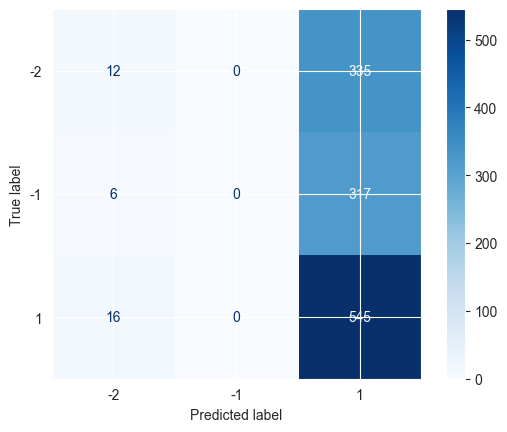

In [13]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(result_test, yhat)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=[AWAY_WINS, DRAW, HOME_WINS], )
disp.plot(cmap="Blues")

In [14]:
test_path_away = '../data/Test_Data/test_away_team_statistics_df.csv'
test_path_home = '../data/Test_Data/test_home_team_statistics_df.csv'
df_attribut_test = prepare_attribut_data(test_path_away, test_path_home,is_test=True)

In [15]:
df_attribut_test.head()

,ID,HOME_TEAM_SHOTS_TOTAL_season_sum,HOME_TEAM_SHOTS_INSIDEBOX_season_sum,HOME_TEAM_SHOTS_OFF_TARGET_season_sum,HOME_TEAM_SHOTS_ON_TARGET_season_sum,HOME_TEAM_SHOTS_OUTSIDEBOX_season_sum,HOME_TEAM_PASSES_season_sum,HOME_TEAM_SUCCESSFUL_PASSES_season_sum,HOME_TEAM_SAVES_season_sum,HOME_TEAM_CORNERS_season_sum,...,AWAY_TEAM_YELLOWCARDS_5_last_match_std,AWAY_TEAM_REDCARDS_5_last_match_std,AWAY_TEAM_OFFSIDES_5_last_match_std,AWAY_TEAM_ATTACKS_5_last_match_std,AWAY_TEAM_PENALTIES_5_last_match_std,AWAY_TEAM_SUBSTITUTIONS_5_last_match_std,AWAY_TEAM_BALL_SAFE_5_last_match_std,AWAY_TEAM_DANGEROUS_ATTACKS_5_last_match_std,AWAY_TEAM_INJURIES_5_last_match_std,AWAY_TEAM_GOALS_5_last_match_std
0,12303,3.0,6.0,5.0,1.0,3.0,9.0,8.0,10.0,6.0,...,6.0,0.0,1.0,4.0,0.0,8.0,7.0,2.0,7.0,0.0
1,12304,3.0,2.0,4.0,2.0,6.0,1.0,1.0,2.0,4.0,...,0.0,0.0,3.0,6.0,8.0,5.0,1.0,1.0,7.0,9.0
2,12305,7.0,10.0,8.0,8.0,1.0,4.0,5.0,0.0,10.0,...,10.0,0.0,0.0,2.0,0.0,4.0,2.0,3.0,0.0,9.0
3,12306,5.0,7.0,5.0,9.0,5.0,7.0,6.0,3.0,5.0,...,1.0,5.0,4.0,5.0,10.0,9.0,6.0,9.0,7.0,3.0
4,12307,5.0,4.0,6.0,3.0,5.0,0.0,0.0,2.0,2.0,...,3.0,0.0,6.0,5.0,0.0,4.0,3.0,10.0,3.0,1.0


In [16]:
yhat_test = best_svm.predict(df_attribut_test)


In [17]:
y_pred_test = pd.DataFrame(yhat_test)
y_pred_test = convert_to_one_hot(yhat_test)

In [18]:
y_pred_test

,HOME_WINS,DRAW,AWAY_WINS
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
25363,0,0,1
25364,0,0,1
25365,0,0,1
25366,0,0,1


In [19]:
test_prediction = pd.concat([df_attribut_test['ID'], y_pred_test], axis=1)

In [20]:
test_prediction.to_csv('../submission/svm_benchmark_submission.csv', index=False)